### Introduccion
En esta notebook vamos a aprender a leer y escribir archivos csv
También, vamos a aprender a guardar datos provenientes de CSVs dentro de las estructuras de datos que vimos hasta el momento

In [1]:
import csv

In [2]:
path = '/home/solmat/Downloads/'

### Leer CSV

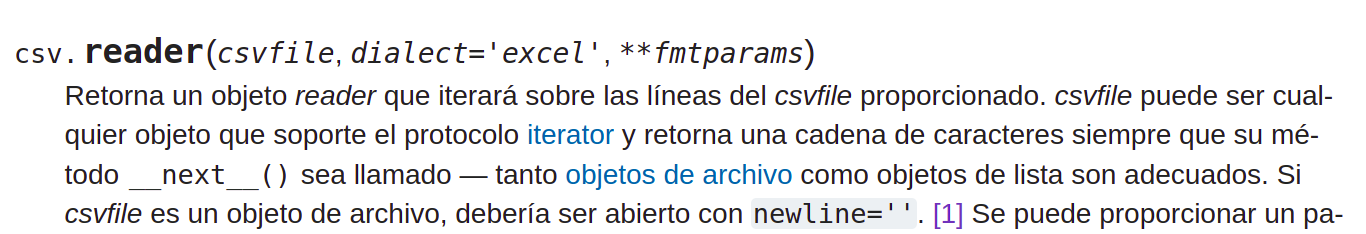

In [1]:
with open(path + 'listings.csv', newline='') as File:
    reader = csv.reader(File, delimiter=',')
    num_row = 1
    for row in reader:
        import pdb; pdb.set_trace()
        num_row += 1
        num_columns = 0
        print(row)
        print("")
        if(num_row == 10): #solo leemos 10 rows
                break;

#### Supongamos que quiero ver los nombres de los primeros 20 registros

In [9]:
nombres = []
with open(path + 'listings.csv', newline='') as File:
    reader = csv.reader(File, delimiter=',')
    num_row = 0
    for row in reader:
        nombres.append(row[4])
        num_row += 1
        if(num_row == 20): #solo leemos 10 rows
                break;

In [10]:
nombres

['name',
 'Quiet Garden View Room & Super Fast WiFi',
 'Studio with private bathroom in the centre 1',
 'Romantic, stylish B&B houseboat in canal district',
 'Comfortable double room',
 'Comfortable single room',
 'Quiet 2-bedroom Amsterdam city centre apartment',
 'Charming apartment in old centre',
 'Multatuli Luxury Guest Suite in top location',
 'Luxurous Houseboat-Great Location',
 'B & B de 9 Straatjes (city center)',
 'Bright Loft in Centre Amsterdam',
 'Apartment near Museumplein (centre)',
 'Charming, beautifully & sunny place with cat Luna',
 'TOP LOCATED Canalhouse B&B Jordaan',
 'The Backroom - Central private appt',
 'Privat room and shared Houseboat "Ramona" centre',
 'Beautiful and spacious room',
 'Spacious, bright apartment near Vondelpark',
 'Entire house with garden in De Pijp']

#### Ahora supongamos que quiero el precio de los alquileres

TO-DO

#### Además, quiero el promedio del costo por noche en la ciudad
Pero los datos son devueltos en formato de cadena.... como los pasamos a números ???

Pistas: slicing de cadenas y funciones para castear datos 

### Escribir CSV

In [5]:
data = [['id', 'listing_url', 'scrape_id', 'last_scraped', 'name'],
         ['2818', 'https://www.airbnb.com/rooms/2818', '20220308023209', '2022-03-08', 'Quiet Garden View Room & Super Fast WiFi'],
         ['20168', 'https://www.airbnb.com/rooms/20168', '20220308023209', '2022-03-31', 'Studio with private bathroom in the centre 1']]
 
File = open('nuevo_archivo.csv', 'w')
with File:
    writer = csv.writer(File)
    writer.writerows(data)
     
print("Writing complete")
 
with open('nuevo_archivo.csv') as File:
    reader = csv.reader(File, delimiter=',')
    for row in reader:
        print(row)

Writing complete
['id', 'listing_url', 'scrape_id', 'last_scraped', 'name']
['2818', 'https://www.airbnb.com/rooms/2818', '20220308023209', '2022-03-08', 'Quiet Garden View Room & Super Fast WiFi']
['20168', 'https://www.airbnb.com/rooms/20168', '20220308023209', '2022-03-31', 'Studio with private bathroom in the centre 1']


### Guardar precios y precios por barrios
Usando los datos del TP vamos a crear un código para calcular:
- el precio promedio 
- el precio promedio por barrios

In [ ]:
suma = 0 # acumulador de precios
cont = 0 #contador de registros
precios = [] #lista para guardar todos los precios, opcional
precio_por_barrio = {} #dicccionario para guardar precios por barrio

with open(path+'listings.csv') as File:
    reader = csv.reader(File, delimiter=',')
    for row in reader:
        if row[39] == 'price':
            continue # Hacemos esto para evitar leer el header pues no tiene datos de interés. Otra forma al final de la notebook
        else:
            p = float(row[39][1:].replace(',',''))# 39 es el indice del precio
            suma = suma + p
            cont += 1
            precios.append(p)
            barrio = row[26] #26 es el idx para los barrios en mis datos
            if barrio in precio_por_barrio.keys():
                precio_por_barrio[barrio].append(p)
            else:
                precio_por_barrio[barrio] = [p]

### Buscar la posición de un índice

In [ ]:
# Este extracto de código se debe ubicar en la posición necesaria
for i in range(len(row)):
if 'neighb' in row[i]:
    print(i, print(row[i]))
    import pdb; pdb.set_trace() # para poner un break point en el código. (c) para continuar, (q) para salir


### Manera más elegante para evitar leer la primera linea de código

In [3]:
with open(path+'listings.csv') as File:
    next(File)
    reader = csv.reader(File, delimiter=',')
    for row in reader:
        print(row)        
        import pdb; pdb.set_trace()

['2818', 'https://www.airbnb.com/rooms/2818', '20220308023209', '2022-03-08', 'Quiet Garden View Room & Super Fast WiFi', 'Quiet Garden View Room & Super Fast WiFi<br /><br /><b>The space</b><br />I\'m renting a bedroom (room overlooking the garden) in my apartment in Amsterdam, <br /><br />The room is located to the east of the city centre in a quiet, typical Amsterdam neighbourhood the "Indische Buurt". Amsterdam’s historic centre is less than 15 minutes away by bike or tram.<br /><br /><br />The features of the room are:<br /><br />- Twin beds (80 x 200 cm, down quilts and pillows) <br />- 2 pure cotton towels for each guest <br />- reading lamps<br />- bedside table<br />- wardrobe<br />- table with chairs<br />- tea and coffee making facilities<br />- mini bar<br />- alarm clock<br />- Hi-Fi system with cd player, connection for mp3 player / phone<br />- map of Amsterdam and public transport<br />- Wi-Fi Internet connection <br /><br />Extra services:<br /><br />- Bike rental<br /

BdbQuit: 